In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision

In [6]:
trainset = torchvision.datasets.MNIST(root='./data' 
                                        , train     =True
                                        , download  =True
                                        , transform = torchvision.transforms.ToTensor())

testset = torchvision.datasets.MNIST(root='./data'
                                        , train     =False
                                        , download  =True
                                        , transform = torchvision.transforms.ToTensor())

In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [27]:
iterator = iter(trainloader)
images, labels = iterator.next()
print(images.shape, labels.shape)
print(type(images))

torch.Size([4, 1, 28, 28]) torch.Size([4])
<class 'torch.FloatTensor'>


In [74]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.dense1 = torch.nn.Linear(28*28, 1000, bias=True)
        self.dense2 = torch.nn.Linear(1000, 28*28, bias=True)
        self.dense3 = torch.nn.Linear(28*28, 10, bias=True)
    def forward(self, x):
        x = torch.nn.functional.relu(self.dense1(x))
        x = torch.nn.functional.relu(self.dense2(x))
        x = self.dense3(x)
        return x

In [77]:
net = Net()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [80]:
import timeit
memory_loss=[]
start_time = timeit.default_timer()
for epoch in range(1):
    for i, data in enumerate(trainloader):
        optimizer.zero_grad()
        
        x, y = data
        x, y = torch.autograd.Variable(x), torch.autograd.Variable(y)
        x = x.view(4, 28*28)
        
        y_ = net(x)

        loss = criterion(y_, y)
        memory_loss.append(loss.data[0])
        loss.backward()
        optimizer.step()
        if i % 2000 == 1999:
            print(i)
            
elapsed = timeit.default_timer() - start_time
print("time: ", elapsed)

1999
3999
5999
7999
9999
11999
13999
time:  323.8100660179989


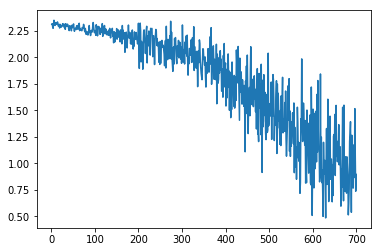

In [100]:
#stat_loss = memory_loss[len(memory_loss)-800:len(memory_loss)]
stat_loss = memory_loss[0:700]
iteration_number = torch.linspace(1, len(stat_loss), len(stat_loss) ).numpy() 
plt.plot(iteration_number, stat_loss)
#print(memory_loss)

In [99]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)
iterator = iter(testloader)

x_test, y_test = iterator.next()
x_test = x_test.view(4, 28*28)
x_test = torch.autograd.Variable( x_test )

y_output_test = net(x_test)

print("prediction", torch.max(y_output_test.data, 1)[1])
print("ground truth: ", y_test)


prediction 
 9
 7
 0
 2
[torch.LongTensor of size 4]

ground truth:  
 9
 7
 0
 2
[torch.LongTensor of size 4]

